# Credit Card Fraud Detection

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.This Model Works on identifying the fraud by analyzing the patterns of transactions and a lot more.



<img src = 'creditcardfraud.jpg'>




Dataset:

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works: 

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Machine Learning for Credit Card Fraud Detection - Practical Handbook 



## Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df =  pd.read_csv('creditcard.csv')


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Observation: 
 Since Credit Card Data is highly private and sensitive piece of information, the dataset owner has anonymized the features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Observation:
It is seen that the dataset is <b>highly imbalanced</b>. since the distribution is sample is 99.83% vs 0.17%.
An imabalanced dataset can create a lot of problems during the classification so it should be handeled.


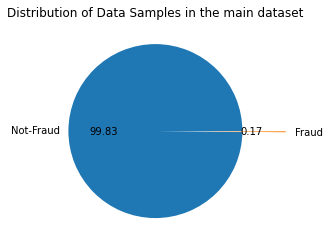

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('Distribution of Data Samples in the main dataset')
explode = (0, 0.5)
plt.pie(df['Class'].value_counts(),labels=['Not-Fraud','Fraud'],autopct='%0.2f',explode=explode)
plt.show()

In [9]:
## Creating a non-fraud vs fraud dataset

nf = df[df['Class']==0]
f = df[df['Class']==1]


In [10]:
nf['Amount'].describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
f['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

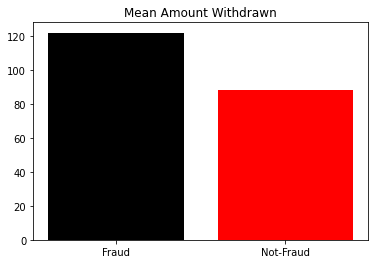

In [12]:


plt.title('Mean Amount Withdrawn')
plt.bar(['Fraud','Not-Fraud'],[f['Amount'].mean(),nf['Amount'].mean()],color=['black','red'])
plt.show()



## Observation:

It is visible that the <b>Mean Amount of Transaction is high</b> in <b>Fraud Cases</b>


In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


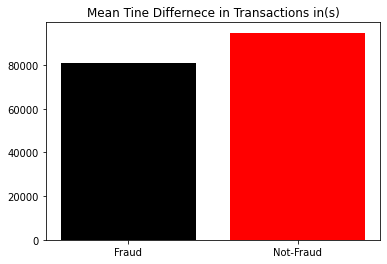

In [14]:
plt.title('Mean Tine Differnece in Transactions in(s)')
plt.bar(['Fraud','Not-Fraud'],[f['Time'].mean(),nf['Time'].mean()],color=['black','red'])
plt.show()

## Undersampling the data randomly 

#### Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets

In [15]:
nf_sample = nf.sample(n=492)

In [16]:
new_df = pd.concat([nf_sample,f],axis=0)

In [17]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284239,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,...,0.319054,1.164338,0.176579,1.008347,-0.221334,0.121159,0.017615,-0.027463,35.00,0
194538,130637.0,2.222608,-1.698259,-1.106873,-1.671913,-1.135322,-0.021550,-1.336728,-0.000497,-0.821258,...,-0.171023,-0.168438,0.182028,-0.026674,-0.246629,-0.165277,0.005802,-0.038165,70.00,0
228570,145570.0,1.953844,0.419564,-2.308213,1.388684,1.012897,-0.658773,0.579065,-0.183863,-0.114011,...,0.022873,0.193403,-0.010557,0.577374,0.434325,-0.543192,-0.009001,-0.029570,23.46,0
283496,171637.0,-0.726680,0.006159,2.235457,-1.357257,-0.497788,0.574468,-0.620884,0.393234,-0.492151,...,-0.150942,0.074160,-0.286154,0.215587,0.342182,-0.071843,0.361380,0.153694,15.26,0
260582,159624.0,1.975135,-0.289806,-0.189125,0.519080,-0.688692,-0.588760,-0.488488,-0.156869,1.225893,...,0.213095,0.951946,0.101041,0.115603,-0.044018,-0.221148,0.052260,-0.032702,9.99,0


In [18]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

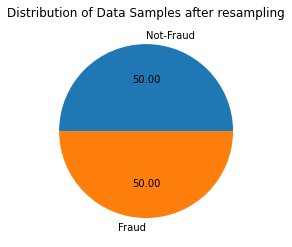

In [19]:
plt.title('Distribution of Data Samples after resampling')
plt.pie(new_df['Class'].value_counts(),labels=['Not-Fraud','Fraud'],autopct='%0.2f')
plt.show()

In [20]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95645.626016,-0.012181,-0.046050,0.083147,-0.043151,-0.017880,0.064907,0.066106,-0.020383,-0.019370,...,0.004405,-0.001320,0.057734,-0.004740,-0.045449,0.047522,0.039113,0.016653,0.014817,99.956138
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Feature Selection


In [22]:
X = new_df.drop(columns='Class',axis=1)
y=new_df['Class']


In [23]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
284239,172266.0,1.880157,-0.485374,0.095951,0.473297,-1.277631,-1.163752,-0.530703,-0.188080,1.340928,...,-0.130672,0.319054,1.164338,0.176579,1.008347,-0.221334,0.121159,0.017615,-0.027463,35.00
194538,130637.0,2.222608,-1.698259,-1.106873,-1.671913,-1.135322,-0.021550,-1.336728,-0.000497,-0.821258,...,-0.358104,-0.171023,-0.168438,0.182028,-0.026674,-0.246629,-0.165277,0.005802,-0.038165,70.00
228570,145570.0,1.953844,0.419564,-2.308213,1.388684,1.012897,-0.658773,0.579065,-0.183863,-0.114011,...,-0.194848,0.022873,0.193403,-0.010557,0.577374,0.434325,-0.543192,-0.009001,-0.029570,23.46
283496,171637.0,-0.726680,0.006159,2.235457,-1.357257,-0.497788,0.574468,-0.620884,0.393234,-0.492151,...,-0.184561,-0.150942,0.074160,-0.286154,0.215587,0.342182,-0.071843,0.361380,0.153694,15.26
260582,159624.0,1.975135,-0.289806,-0.189125,0.519080,-0.688692,-0.588760,-0.488488,-0.156869,1.225893,...,-0.119257,0.213095,0.951946,0.101041,0.115603,-0.044018,-0.221148,0.052260,-0.032702,9.99


## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [25]:
X


array([[ 1.74718817,  0.77643916, -0.61494592, ..., -0.07610771,
        -0.15443911, -0.29896369],
       [ 0.88202957,  0.83867677, -0.94290552, ..., -0.08793784,
        -0.17717053, -0.16143456],
       [ 1.19237604,  0.78983121, -0.37025369, ..., -0.10276175,
        -0.15891521, -0.34430901],
       ...,
       [ 1.68660691,  0.31185392, -0.17913707, ...,  0.29191207,
         0.31675543, -0.13043157],
       [ 1.6993882 , -0.13117489, -0.32528684, ...,  0.79239744,
        -0.6350064 ,  0.5262111 ],
       [ 1.70732715,  0.79676135, -0.4408511 , ..., -0.09075621,
        -0.12862103, -0.26937528]])

In [26]:
y

284239    0
194538    0
228570    0
283496    0
260582    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

## Splitting into Training and Testing Sets

In [30]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,
                                                stratify=y,
                                               random_state=3)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


rfc= RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()





In [32]:
rfc.fit(X_train,y_train)
rfc_predict=rfc.predict(X_test)




------Classification Report------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



------All AUC Scores------
[0.99755102 0.9877551  1.         0.94836735 0.94252395 0.97980008
 0.99729279 0.99604332 0.98042482 0.98375677]


------ Mean AUC Score------
Mean AUC Score - Random Forest:  0.9813515201999167


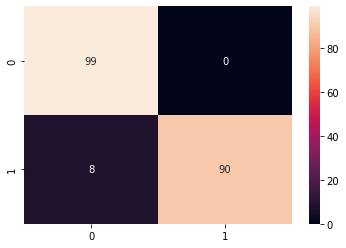

In [40]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")




sns.heatmap(confusion_matrix(y_test, rfc_predict),annot=True)
print('\n')
print("------Classification Report------")
print(classification_report(y_test, rfc_predict))
print('\n')
print("------All AUC Scores------")
print(rfc_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())



In [34]:
svc.fit(X_train,y_train)
svc_predict=svc.predict(X_test)




------Classification Report------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



------All AUC Scores------
[0.99469388 0.99469388 0.99959184 0.96285714 0.95668471 0.97501041
 0.99583507 0.98708871 0.98667222 0.97042899]


------ Mean AUC Score------
Mean AUC Score - SVM:  0.9823556851311954


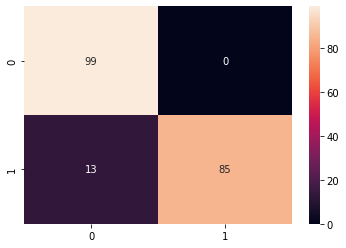

In [35]:
svc_cv_score = cross_val_score(svc, X, y, cv=10, scoring="roc_auc")



sns.heatmap(confusion_matrix(y_test, svc_predict),annot=True)
print('\n')
print("------Classification Report------")
print(classification_report(y_test, svc_predict))
print('\n')
print("------All AUC Scores------")
print(svc_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - SVM: ", svc_cv_score.mean())



In [36]:
dtc.fit(X_train,y_train)
dtc_predict=dtc.predict(X_test)



------Classification Report------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



------All AUC Scores------
[0.85877551 0.94979592 0.96938776 0.82877551 0.91836735 0.92857143
 0.95918367 0.91836735 0.89795918 0.92857143]


------ Mean AUC Score------
Mean AUC Score - Decision Tree:  0.9157755102040817


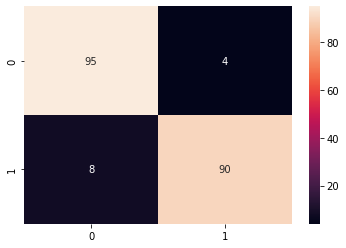

In [39]:
dtc_cv_score = cross_val_score(dtc, X, y, cv=10, scoring="roc_auc")



sns.heatmap(confusion_matrix(y_test, dtc_predict),annot=True)
print('\n')
print("------Classification Report------")
print(classification_report(y_test, dtc_predict))
print('\n')
print("------All AUC Scores------")
print(dtc_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - Decision Tree: ", dtc_cv_score.mean())



In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=8.465727156656165, gamma=0.07770540547358651; total time=   0.0s
[CV] END .....C=8.465727156656165, gamma=0.07770540547358651; total time=   0.0s
[CV] END .....C=8.465727156656165, gamma=0.07770540547358651; total time=   0.0s
[CV] END .......C=9.731009364786182, gamma=0.003003338646268; total time=   0.0s
[CV] END .......C=9.731009364786182, gamma=0.003003338646268; total time=   0.0s
[CV] END .......C=9.731009364786182, gamma=0.003003338646268; total time=   0.0s
[CV] END ...C=10.931484879740085, gamma=0.006871070054614396; total time=   0.0s
[CV] END ...C=10.931484879740085, gamma=0.006871070054614396; total time=   0.0s
[CV] END ...C=10.931484879740085, gamma=0.006871070054614396; total time=   0.0s
[CV] END .....C=4.858963043687199, gamma=0.06795314961879083; total time=   0.0s
[CV] END .....C=4.858963043687199, gamma=0.06795314961879083; total time=   0.0s
[CV] END .....C=4.858963043687199, gamma=0.06795

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c10aeea10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1c0ffcf940>},
                   verbose=2)

In [42]:
 svct_predict=rnd_search_cv.best_estimator_.predict(X_test)



------Classification Report------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



------All AUC Scores------
[0.99469388 0.99387755 1.         0.96489796 0.97167847 0.97834236
 0.99583507 0.99208663 0.99333611 0.97084548]


------ Mean AUC Score------
Mean AUC Score - Tuned SVC:  0.9855593502707206


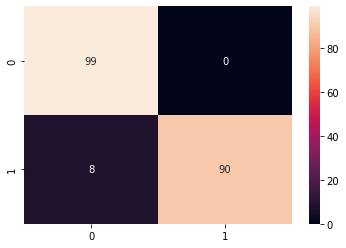

In [44]:
svct_cv_score = cross_val_score(rnd_search_cv.best_estimator_, X, y, cv=10, scoring="roc_auc")



sns.heatmap(confusion_matrix(y_test, svct_predict),annot=True)
print('\n')
print("------Classification Report------")
print(classification_report(y_test, svct_predict))
print('\n')
print("------All AUC Scores------")
print(svct_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - Tuned SVC: ", svct_cv_score.mean())



In [45]:
from sklearn.model_selection import RandomizedSearchCV# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = ['auto','sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the model
rfc_random.fit(X_train, y_train)# print results
print(rfc_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 460}


In [ ]:


# rfc_tuned = rfc_random.best_estimators_(n_estimators=800, max_features= 'sqrt', max_depth=260)
# rfc_tuned.fit(X_train,y_train)



In [46]:
rfc_tuned_predict = rfc_random.best_estimator_.predict(X_test)

[CV] END max_depth=140, max_features=auto, n_estimators=1000; total time=   2.7s
[CV] END max_depth=100, max_features=auto, n_estimators=1400; total time=   3.5s
[CV] END max_depth=300, max_features=auto, n_estimators=2000; total time=   5.0s
[CV] END .max_depth=420, max_features=sqrt, n_estimators=600; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, n_estimators=800; total time=   2.0s
[CV] END max_depth=260, max_features=auto, n_estimators=1400; total time=   3.7s
[CV] END .max_depth=380, max_features=auto, n_estimators=800; total time=   2.0s
[CV] END .max_depth=380, max_features=auto, n_estimators=800; total time=   2.1s
[CV] END max_depth=180, max_features=auto, n_estimators=1200; total time=   3.0s
[CV] END max_depth=300, max_features=sqrt, n_estimators=1000; total time=   2.5s
[CV] END max_depth=300, max_features=sqrt, n_estimators=1000; total time=   2.6s
[CV] END .max_depth=300, max_features=sqrt, n_estimators=800; total time=   2.0s
[CV] END .max_depth=300, max

[CV] END max_depth=100, max_features=auto, n_estimators=1400; total time=   3.5s
[CV] END .max_depth=260, max_features=sqrt, n_estimators=800; total time=   1.9s
[CV] END max_depth=300, max_features=auto, n_estimators=2000; total time=   4.7s
[CV] END max_depth=300, max_features=auto, n_estimators=1000; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, n_estimators=800; total time=   1.9s
[CV] END max_depth=260, max_features=auto, n_estimators=1400; total time=   3.4s
[CV] END max_depth=100, max_features=auto, n_estimators=2000; total time=   4.9s
[CV] END max_depth=500, max_features=auto, n_estimators=1400; total time=   3.5s
[CV] END max_depth=300, max_features=sqrt, n_estimators=1000; total time=   2.5s
[CV] END max_depth=420, max_features=auto, n_estimators=1800; total time=   4.6s
[CV] END max_depth=None, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END max_depth=460, max_features=auto, n_estimators=1200; total time=   3.0s
[CV] END max_depth=100, max_



------Classification Report------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.92      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



------All AUC Scores------
[0.9944898  0.98938776 1.         0.94061224 0.94793836 0.9816743
 0.99812578 0.9941691  0.97480217 0.99208663]


------ Mean AUC Score------
Mean AUC Score - Random Forest:  0.9813286130778842


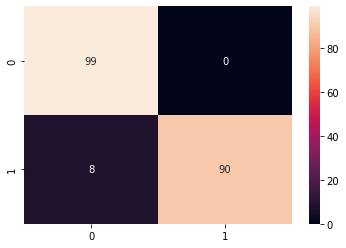

In [47]:


rfc_tuned_cv_score = cross_val_score(rfc_random.best_estimator_, X, y, cv=10, scoring="roc_auc")



sns.heatmap(confusion_matrix(y_test, rfc_tuned_predict),annot=True)
print('\n')
print("------Classification Report------")
print(classification_report(y_test, rfc_tuned_predict))
print('\n')
print("------All AUC Scores------")
print(rfc_tuned_cv_score)
print('\n')
print("------ Mean AUC Score------")
print("Mean AUC Score - Random Forest: ", rfc_tuned_cv_score.mean())



In [ ]:
# Tuned SVC Model Worked Well